# Missing Values

---

#### Definition:
- In an observational dataset, the missing fields are called missing data or missing values.

#### Types of Missing Data:
There are 3 main categories of missing data.
1. Missing completely at random(MCAR):
    - The values are randomly missing.
    - Missing data do not follow any trend or pattern.
    - These missing values are unrelated to the rest of the data.
    - Hence, impossible to predict the missing values based on the rest of the data points.
2. Missing at random(MAR):
    - Data is missing amongst particular subsets.
    - The data might follow a pattern.
    - Possible to predict the missing values with help of other variables.
3. Missing not at random(MNAR):
    - The probability of of being missing varies for reasons that is unknown to the analyst.
    - The missing values of that field is not related to the missing information.
    - The missing points are related to other information of the dataset.
    - Very critical case. Domain knowledge is expected while dealing with this type of missing dataset.
 
#### Reasons behind Missing Data:
1. People do not share specific information in a survey.
2. Human errors during observation, collection and updating of the dataset.
3. Data accumulation from various sources like poorly archived database, dilapidated old datasets leads to loss of some data points
3. Machinery malfunction or inconsistencies in measurement.
4. Other experimental problems like rare species, insufficient information, drop out of the volunteer.

#### Check for Missing Data:
- To check if the dataset has missing values or not use the Pandas DataFrame's `isna()` method. Precisely to get the sum of missing values, use `isna().sum()`.
- `Missingno` library can be used in Python to check for missing values. 
    - Missingno gives a visualize information about missing values in the dataset.
    - Bar chart, matrix plot, and dendogram are use full visualizing techniques.

#### Treating Missing Values.
- Missing values are treated as per their appearance in the dataset.
1. Deletion:
    - Pairwise deletion: Ignore the cells with missing values.
    - Listwise deletion: Delete the entire row which has missing values.
    - Columnwise deletion: Drop the entire column if it has more than 30% of missing values.
2. Imputation of non-time series data:
    - Replace the values with any appropriate constant.
    - If the missing values <25%, then fill with mean value, else can fill with standard deviation value..
    - If the column has outlier, fill with median value.
    - If the column has no outlier, fill with mean value.
    - If the missing values are in categorical column, fill with mode.
3. Imputation of time series data:
    - Backward fill: fill the missing values with lower rows value.
    - Forward fill: fill the missing values with upper rows value.
    - Linear interpolation: fill as per the trend in the dataset.
4. Advanced Imputation Technique:
    - K-NN imputation
    - Multivariate feature imputation.

In [1]:
# import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
%matplotlib inline

### Visualizing Missing Values

In [2]:
# load the dataset to a dataframe
df = pd.read_csv('/media/ashrulochan/EAD0BE77D0BE4999/Disk H/VSC WorkSpace/Guvi/B-K-Sir Assignments/out-of-school-rates-global-data/lower-secondary.csv')

df.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,40.0,56.0,25.0,46.0,23.0,50.0,48.0,49.0,33.0,21.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,6.0,6.0,5.0,8.0,4.0,12.0,6.0,5.0,3.0,2.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,15.0,17.0,14.0,28.0,10.0,31.0,26.0,16.0,6.0,4.0,DHS 2015-16,2016.0


- This dataset is about children dropping out from lower secondary study worldwide.
- Let's check for missing values.

In [5]:
df.isna()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

ISO3                         0
Countries and areas          0
Region                       2
Sub-region                   2
Development Regions          0
Total                       92
Female                      92
Male                        92
Rural_Residence             95
Urban_Residence             95
Poorest_Wealth quintile    100
Second_Wealth quintile     100
Middle_Wealth quintile     100
Fourth_Wealth quintile     100
Richest_Wealth quintile    100
Data source                 92
Time period                 92
dtype: int64

- The `isna()` method returns dataframe, which is not easy to visualize the missing values. Though the missing value fields comes with a boolean value of True.
- For clear understanding we can use 'isna().sum()` method.
- To visualize the dataset we will use missingno

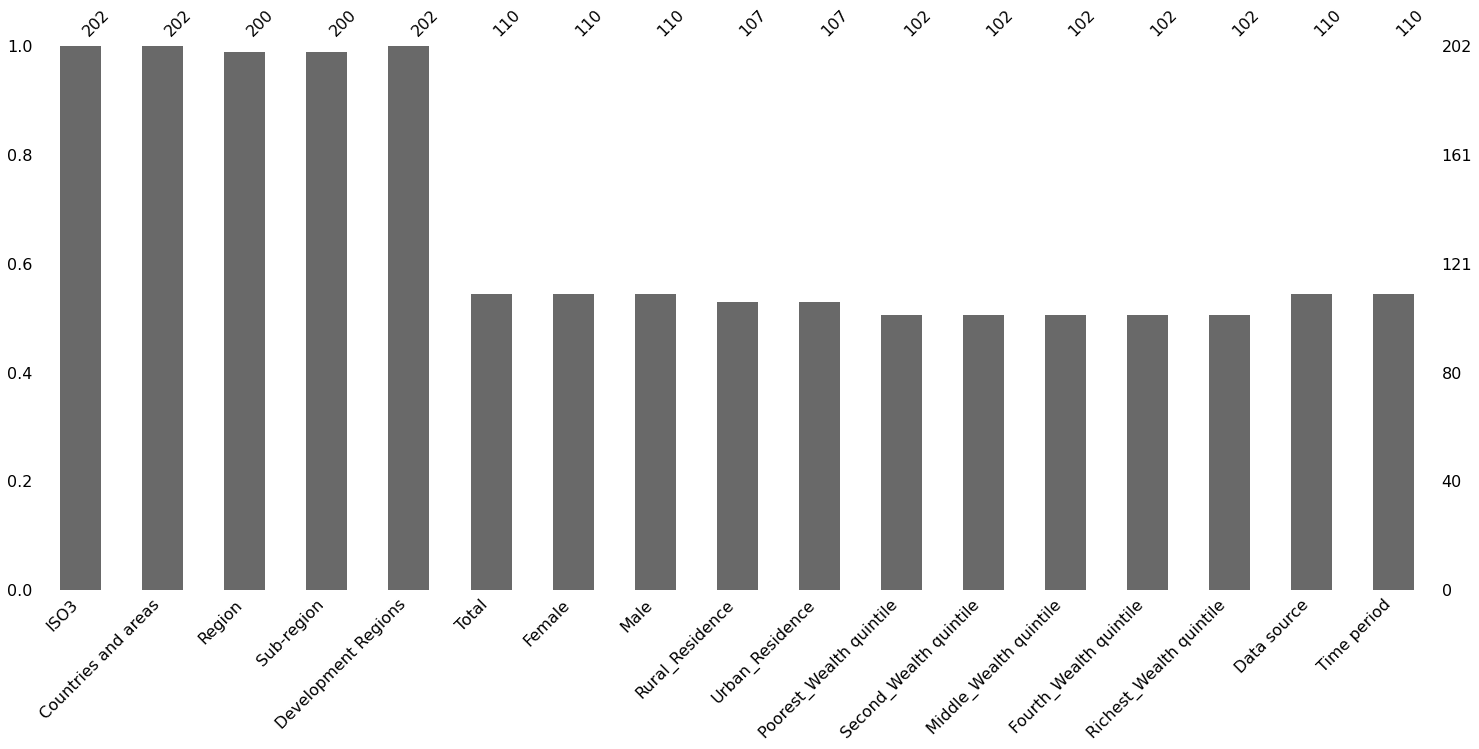

In [8]:
# missing values bar chart
msn.bar(df)
plt.show()

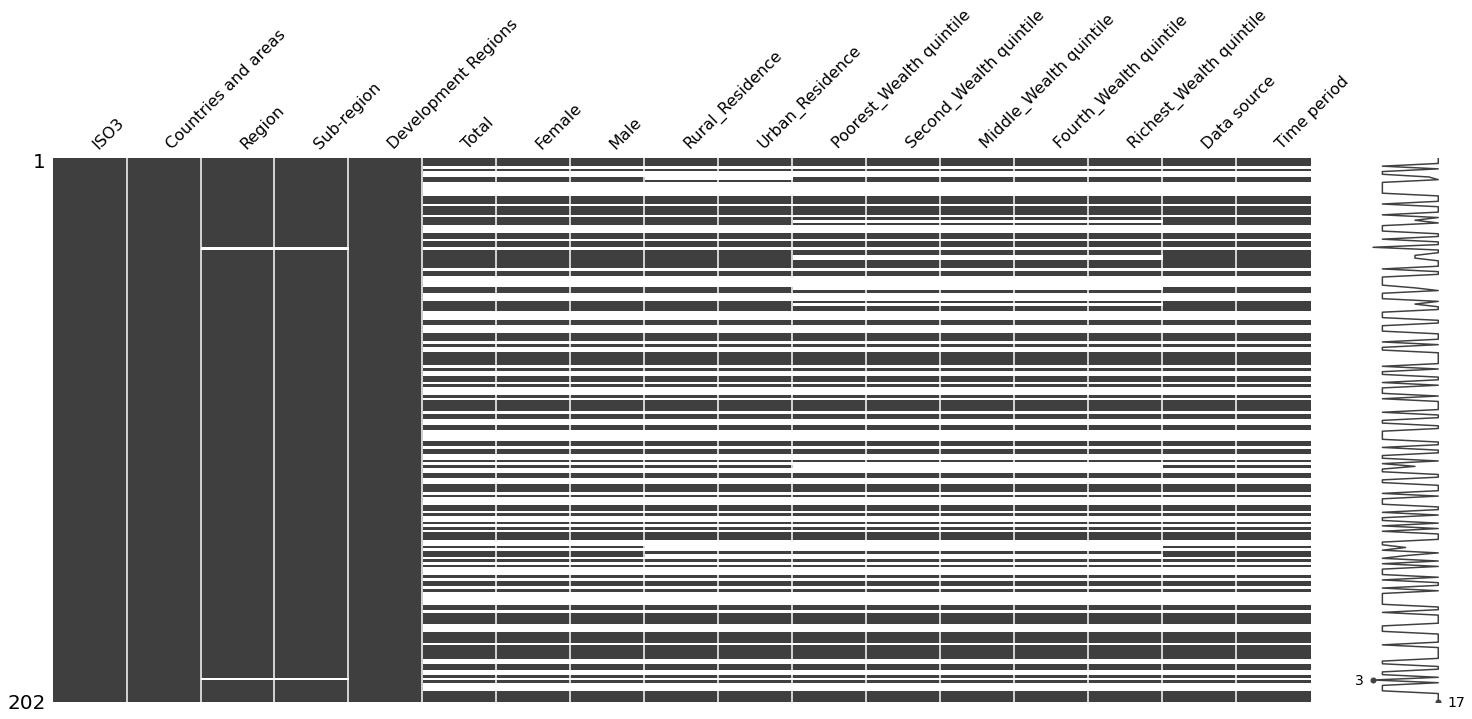

In [9]:
# matrix plot
msn.matrix(df);

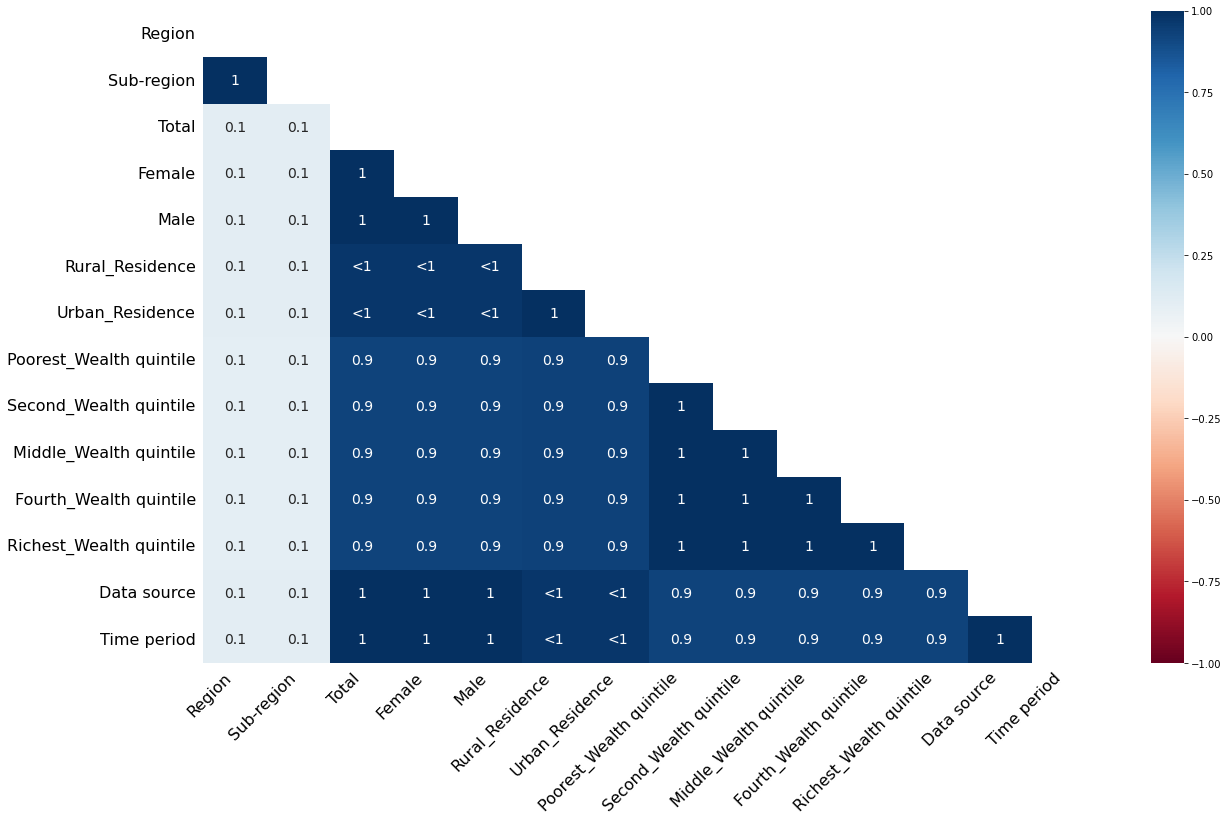

In [11]:
# heatmap
msn.heatmap(df);

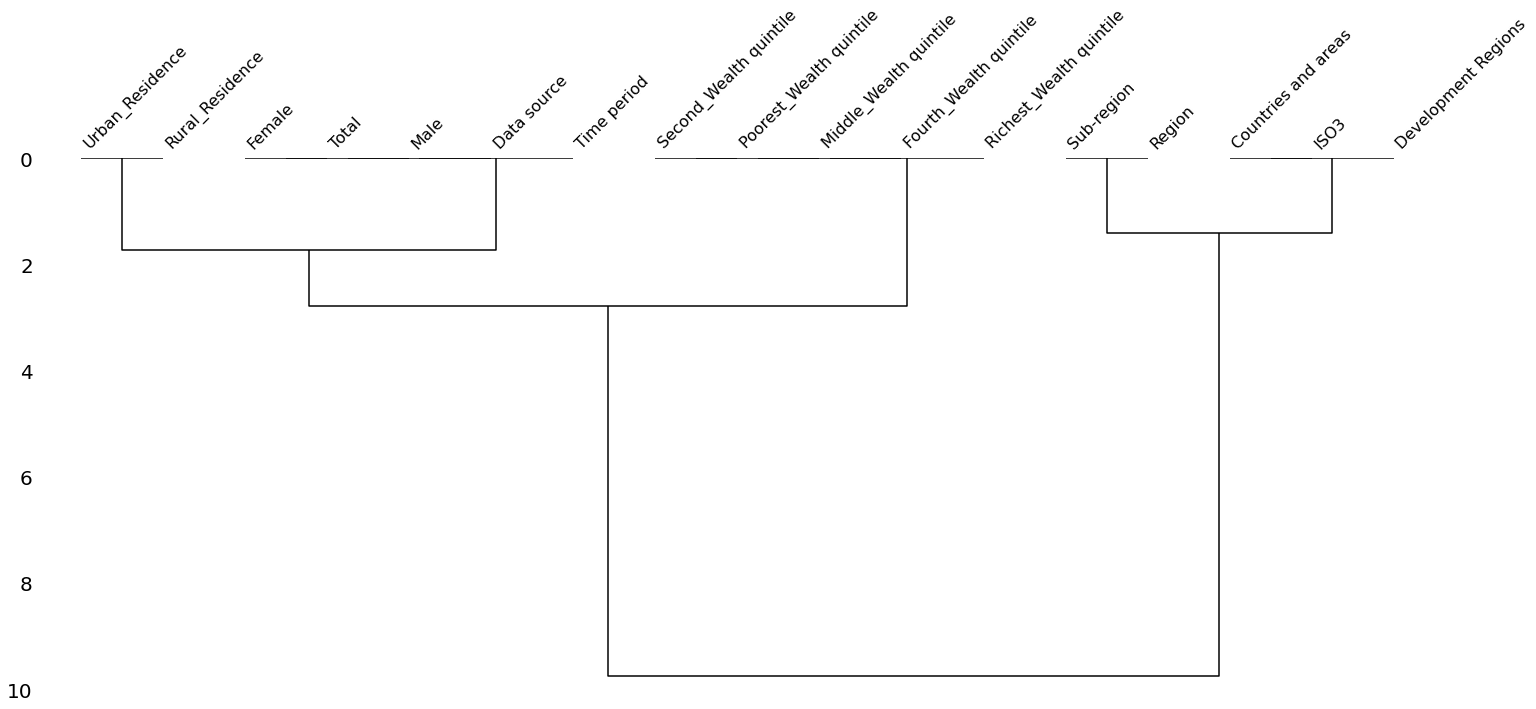

In [13]:
# dendogram
msn.dendrogram(df);

- The bar chart shows overall present dataset excluding missing values.
- The matrix plot shows how the missing values are distributed in the dataset.
- The heatmap shows what relational data are missing.
- The dendogram shows the range of the data that are missing.

## Treating Missing values:
----
### Deletion

In [14]:
# pairwise deletion
# ignore the missing values
# to do show let's replace the 'NaN' with 0

new_df = df.fillna(0)

new_df.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,40.0,56.0,25.0,46.0,23.0,50.0,48.0,49.0,33.0,21.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,6.0,6.0,5.0,8.0,4.0,12.0,6.0,5.0,3.0,2.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,AGO,Angola,SSA,ESA,Least Developed,15.0,17.0,14.0,28.0,10.0,31.0,26.0,16.0,6.0,4.0,DHS 2015-16,2016.0


In [15]:
# Check if the new_df dataframe has missing values or not
new_df.isna().sum()

ISO3                       0
Countries and areas        0
Region                     0
Sub-region                 0
Development Regions        0
Total                      0
Female                     0
Male                       0
Rural_Residence            0
Urban_Residence            0
Poorest_Wealth quintile    0
Second_Wealth quintile     0
Middle_Wealth quintile     0
Fourth_Wealth quintile     0
Richest_Wealth quintile    0
Data source                0
Time period                0
dtype: int64

In [3]:
# Columnwise deletion
# if a column has more than 30% missing values, that column will be dropped.

# checking for missing values percentage

missing_df = pd.DataFrame(df.isna().sum())

missing_df.reset_index(inplace=True)

In [4]:
missing_df.rename(columns={'index':'column_names', 0:'missing_values_count'}, inplace=True)

missing_df

,column_names,missing_values_count
0,ISO3,0
1,Countries and areas,0
2,Region,2
3,Sub-region,2
4,Development Regions,0
5,Total,92
6,Female,92
7,Male,92
8,Rural_Residence,95
9,Urban_Residence,95


In [5]:
# Shape of dataframe
df.shape

(202, 17)

In [7]:
# % percent of missing values

missing_df['missing_value_percentage'] = round((missing_df.missing_values_count / 200)*100,2)


missing_df

,column_names,missing_values_count,missing_value_percentage
0,ISO3,0,0.0
1,Countries and areas,0,0.0
2,Region,2,1.0
3,Sub-region,2,1.0
4,Development Regions,0,0.0
5,Total,92,46.0
6,Female,92,46.0
7,Male,92,46.0
8,Rural_Residence,95,47.5
9,Urban_Residence,95,47.5


- Before performing column-wise or row-wise deletion, check whether the column is an important attribute to the dataset or not.
- If not an very important attribute, then drop it, otherwise prefer pairwise deletion.

- Here, the columns that have very much missing values, doesn't affect the analysis, as we are just experimenting.
- So, we can happily drop those columns.

In [3]:
# we will drop the female - data source columns
dropping_list = ['Female', 'Male', 'Rural_Residence', 'Urban_Residence', 'Poorest_Wealth quintile', 'Second_Wealth quintile', 'Middle_Wealth quintile', 'Fourth_Wealth quintile', 'Richest_Wealth quintile', 'Data source']

df.drop(columns=dropping_list,inplace=True)

df.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,40.0,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,6.0,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,15.0,2016.0


In [5]:
df.isna().sum()

ISO3                    0
Countries and areas     0
Region                  2
Sub-region              2
Development Regions     0
Total                  92
Time period            92
dtype: int64

In [7]:
# Row-wise deletion
# we have now some columns with missing values, but they don't follow any trend.
# These rows are not even contributing much.
# Let's drop the rows

# processed_df = df.dropna()
# Dropna is a handy method to drop all the rows with missing values,
# But, in this case, there are two missing values in the region and sub-region column
# We should be careful to only drop the total and time period nan rows.

processed_df = df.dropna(subset=['Total','Time period'])

processed_df.head(10)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,40.0,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,6.0,2013.0
4,AGO,Angola,SSA,ESA,Least Developed,15.0,2016.0
7,ARG,Argentina,LAC,LAC,Less Developed,2.0,2012.0
8,ARM,Armenia,ECA,EECA,Less Developed,1.0,2016.0
14,BGD,Bangladesh,SA,SA,Least Developed,13.0,2019.0
15,BRB,Barbados,LAC,LAC,Less Developed,1.0,2012.0
16,BLR,Belarus,ECA,EECA,More Developed,0.0,2012.0
18,BLZ,Belize,LAC,LAC,Less Developed,9.0,2016.0


In [8]:
processed_df.isna().sum()

ISO3                   0
Countries and areas    0
Region                 0
Sub-region             0
Development Regions    0
Total                  0
Time period            0
dtype: int64

- The `subset` parameter of dropna method is helpful while deleting rows with NaN. This makes sure that unnecessary columns don't gets deleted.
    - The subset=['A', 'B'] means that drop all rows with NaNs in column A or B
- Similarly other parameters i.e.
    - `thresh=x`: Drop row if it does not have at least 'x' values that are not NaN.
    - `how='all'`: Drop only rows with all columns NaN.


### Non-Time Series Data
---

- If the dataset doesn't follow any trend, is called non-time series data.
- In case of non-time series data, check the presence of outliers in that column.
- If the column has outliers, replace with median value.
- If the column has no outliers, then replace the missing values with mean or std.
- If the column has missing values <25% fill with mean values, else fill with std.
- In case of categorical data, fill with mode.


In [13]:
# import basic libraries
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [29]:
# load the dataset to dataframe
# Here, Melbourne Housing dataset is used.

df = pd.read_csv('melb_data.csv')

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
missing_value_counts_per_column = df.isnull().sum()

In [7]:
missing_value_counts_per_column[missing_value_counts_per_column>0]

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

- Four columns has missing values
- Let's check these in detail

In [9]:
df[['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']]

,Car,BuildingArea,YearBuilt,CouncilArea
0,1.0,NaN,NaN,Yarra
1,0.0,79.0,1900.0,Yarra
2,0.0,150.0,1900.0,Yarra
3,1.0,NaN,NaN,Yarra
4,2.0,142.0,2014.0,Yarra
...,...,...,...,...
13575,2.0,NaN,1981.0,NaN
13576,2.0,133.0,1995.0,NaN
13577,4.0,NaN,1997.0,NaN
13578,5.0,157.0,1920.0,NaN


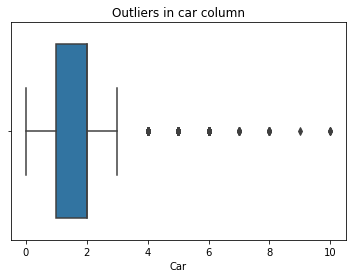

In [16]:
# Check for outliers in the numerical columns with missing values

sns.boxplot(df['Car'])
plt.title('Outliers in car column')
plt.show()

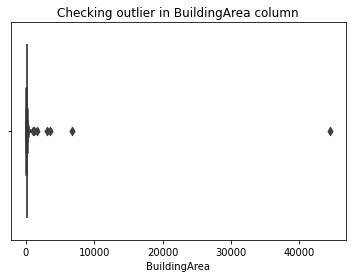

In [17]:
sns.boxenplot(df['BuildingArea'])
plt.title('Checking outlier in BuildingArea column');

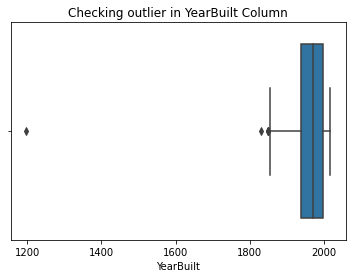

In [18]:
sns.boxplot(df['YearBuilt'])
plt.title('Checking outlier in YearBuilt Column')
plt.show()

#### Imputation with Median
- As the columns have outlier, we need to impute the missing values with median

In [30]:
# Imputation with median
df['Car'] = df['Car'].replace(np.NaN, df['Car'].median())

df['Car'][:10]

0    1.0
1    0.0
2    0.0
3    1.0
4    2.0
5    0.0
6    0.0
7    2.0
8    1.0
9    2.0
Name: Car, dtype: float64

In [31]:
df['BuildingArea'] = df['BuildingArea'].replace(np.NaN, df['BuildingArea'].median())

df['BuildingArea'][:10]

0    126.0
1     79.0
2    150.0
3    126.0
4    142.0
5    126.0
6    210.0
7    107.0
8    126.0
9     75.0
Name: BuildingArea, dtype: float64

#### Imputation with Mean or Standard Deviation
- The car column has few outliers, it might not affect the dataset much,
- We can fill the missing values of Car column with mean or standard deviation for experimental purpose.
- Before that we should check percentage of missing values

In [25]:
df_1 = pd.read_csv('melb_data.csv')
df_1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [26]:
# let's check % of missing values

missing_value_counts_per_column['Car']/df_1.shape[0] * 100

0.45655375552282773

In [27]:
# imputation with mean
df_1.Car = df_1.Car.replace(np.NaN, df_1.Car.mean())

df_1.Car[:15]

0     1.0
1     0.0
2     0.0
3     1.0
4     2.0
5     0.0
6     0.0
7     2.0
8     1.0
9     2.0
10    1.0
11    2.0
12    1.0
13    1.0
14    1.0
Name: Car, dtype: float64

### Time Series dataset

---


- The YearBuilt column is a time series dataset, we can't fill the missing values of this column with mean,median or std.
- The missing values can be filled with forward fill or backward fill.
- If there is any trend in the dataset, linear interpolation can be used.


##### Fill with Previous value/Fill with lower values

In [53]:
# create a dataframe
df_2 = pd.DataFrame({
    'English': [76, np.NaN, 80, 85, np.NaN],
    'Science': [np.NaN, 86, 90, 87, np.NaN],
    'Social Science': [84, 73, np.NaN, 79, 89],
    'Mathematics':[90, 92, np.NaN, 88, np.NaN]
})

df_2

,English,Science,Social Science,Mathematics
0,76.0,NaN,84.0,90.0
1,NaN,86.0,73.0,92.0
2,80.0,90.0,NaN,NaN
3,85.0,87.0,79.0,88.0
4,NaN,NaN,89.0,NaN


In [64]:
week = pd.date_range('01/11/2021', periods=7, freq='d')

df_3 = pd.DataFrame(index=week)
df_3['water'] = [2.0, np.nan, 3.0, np.nan, 4.0,4.5,np.nan]

df_3

,water
2021-01-11,2.0
2021-01-12,NaN
2021-01-13,3.0
2021-01-14,NaN
2021-01-15,4.0
2021-01-16,4.5
2021-01-17,NaN


In [54]:
# Filling the dataset with previous value
df_2.fillna(method='ffill') # 'pad' can also be used for forward fill

,English,Science,Social Science,Mathematics
0,76.0,NaN,84.0,90.0
1,76.0,86.0,73.0,92.0
2,80.0,90.0,73.0,92.0
3,85.0,87.0,79.0,88.0
4,85.0,87.0,89.0,88.0


In [65]:
df_3.fillna(method='pad')

,water
2021-01-11,2.0
2021-01-12,2.0
2021-01-13,3.0
2021-01-14,3.0
2021-01-15,4.0
2021-01-16,4.5
2021-01-17,4.5


In [36]:
# filling the missing values with lower values

df_2.fillna(method='bfill', inplace=True)

df_2

,English,Science,Social Science,Mathematics
0,76.0,86.0,84.0,90.0
1,76.0,86.0,73.0,92.0
2,80.0,90.0,73.0,92.0
3,85.0,87.0,79.0,88.0
4,85.0,87.0,89.0,88.0


#### Linear Interpolation

In [66]:
# Linear interpolation
df_3.interpolate(limit_direction='both')

,water
2021-01-11,2.0
2021-01-12,2.5
2021-01-13,3.0
2021-01-14,3.5
2021-01-15,4.0
2021-01-16,4.5
2021-01-17,4.5


In [38]:
# now we can add the iterpolation method to our house price dataset
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [40]:
# linear interpolation

df.interpolate(method='linear', limit_direction='forward', inplace=True)

In [41]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           1
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [42]:
df.interpolate(method='linear', limit_direction='backward', inplace=True)


In [43]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [44]:
df.YearBuilt[:15]

0     1900.000000
1     1900.000000
2     1900.000000
3     1957.000000
4     2014.000000
5     1962.000000
6     1910.000000
7     1890.000000
8     1895.000000
9     1900.000000
10    1952.500000
11    2005.000000
12    2009.000000
13    1969.333333
14    1929.666667
Name: YearBuilt, dtype: float64

#### Filling Missing Values of Categorical Data

---


In [45]:
df.CouncilArea.unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [52]:
df.CouncilArea.value_counts().head(10)

Moreland         2532
Boroondara       1160
Moonee Valley     997
Darebin           934
Glen Eira         848
Stonnington       719
Maribyrnong       692
Yarra             647
Port Phillip      628
Banyule           594
Name: CouncilArea, dtype: int64

In [46]:
# mode
df.CouncilArea.mode()

0    Moreland
dtype: object

In [49]:
df.CouncilArea = df.CouncilArea.replace(np.NaN, df.CouncilArea.mode()[0])

df.CouncilArea[:15]

0     Yarra
1     Yarra
2     Yarra
3     Yarra
4     Yarra
5     Yarra
6     Yarra
7     Yarra
8     Yarra
9     Yarra
10    Yarra
11    Yarra
12    Yarra
13    Yarra
14    Yarra
Name: CouncilArea, dtype: object

In [51]:
df.CouncilArea.value_counts().head()

Moreland         2532
Boroondara       1160
Moonee Valley     997
Darebin           934
Glen Eira         848
Name: CouncilArea, dtype: int64

### Advanced Imputing Methods

In [68]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


In [89]:
df = pd.read_csv('melb_data.csv')
val =df[['Car', 'BuildingArea']].values

val.shape

(13580, 2)

#### Simple Imputer

In [75]:
print('Missing values before applying imputer:', np.isnan(val).sum())

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

transformed_val = imputer.fit_transform(val)

print('Missing values after applying imputer:', np.isnan(transformed_val).sum())

Missing values before applying imputer: 6512
Missing values after applying imputer: 0


In [81]:
print('Original Values\n',val.tolist()[:10])
print('')
print('Transformed Values\n',transformed_val.tolist()[:10])

Original Values
 [[1.0, nan], [0.0, 79.0], [0.0, 150.0], [1.0, nan], [2.0, 142.0], [0.0, nan], [0.0, 210.0], [2.0, 107.0], [1.0, nan], [2.0, 75.0]]

Transformed Values
 [[1.0, 151.96764988779805], [0.0, 79.0], [0.0, 150.0], [1.0, 151.96764988779805], [2.0, 142.0], [0.0, 151.96764988779805], [0.0, 210.0], [2.0, 107.0], [1.0, 151.96764988779805], [2.0, 75.0]]


#### KNN Imputer

In [90]:
from sklearn.impute import KNNImputer

# instaniating imputer
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')

print('Total number of missing values before applying imputer:', df.BuildingArea.isnull().sum())
print('Before applying knn imputer:\n',df.BuildingArea[:10])

# fit the imputer and transform
df.BuildingArea = knn_imputer.fit_transform(df[['BuildingArea']])

print(' ')

print('Total number of missing values after applying imputer:', df.BuildingArea.isnull().sum())
print('After applying knn imputer:\n',df.BuildingArea[:10])


Total number of missing values before applying imputer: 6450
Before applying knn imputer:
 0      NaN
1     79.0
2    150.0
3      NaN
4    142.0
5      NaN
6    210.0
7    107.0
8      NaN
9     75.0
Name: BuildingArea, dtype: float64
 
Total number of missing values before applying imputer: 0
Before applying knn imputer:
 0    151.96765
1     79.00000
2    150.00000
3    151.96765
4    142.00000
5    151.96765
6    210.00000
7    107.00000
8    151.96765
9     75.00000
Name: BuildingArea, dtype: float64


## Conclusion:

----

Missing values arises in the dataset due to so many reasons adn dealing with them is important as they can cause bias to the prediction. They reduce the confidence of the model. Hence, it is very important to deal with missing values effectively. But, in the way we should think of various causes of missing values, and then it will be effective and easy to deal with them. A little domain knowledge is helpful in the process.


## Reference:

- [How to Deal with Missing Data](https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/)
- [Missing Values in Data](https://www.statisticssolutions.com/dissertation-resources/missing-values-in-data/?__cf_chl_tk=6pJTl.6dOM_h1euXBb4X7waMex12OIGYQVMaw1LdYuE-1642676489-0-gaNycGzNCOU)
- [Handling Missing Values](https://www.kaggle.com/dansbecker/handling-missing-values)
- [End-to-End Introduction to Handling Missing Values](https://www.analyticsvidhya.com/blog/2021/10/end-to-end-introduction-to-handling-missing-values/)

### Used datasets
- [Out of School Rates Global Data](https://www.kaggle.com/komalkhetlani/out-of-school-rates-global-data)
- [Melbourne Housing Snapshot](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home)
